In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# for easier reading np
np.set_printoptions(precision=3,suppress=True)

In [2]:
with open('heart.csv') as f:
    temp = np.loadtxt(f, delimiter=',', skiprows=1)
X = temp[:,:-1]
X = MinMaxScaler().fit_transform(X)

y = temp[:,-1]
from sklearn.preprocessing import OneHotEncoder
drop_enc = OneHotEncoder()
y = drop_enc.fit_transform(y.reshape(-1, 1)).toarray()

feats_train,feats_val,Y_train,Y_val =  train_test_split(X, y, train_size=0.75, shuffle = True, stratify = y);


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 24)                336       
                                                                 
 dense_6 (Dense)             (None, 50)                1250      
                                                                 
 dense_7 (Dense)             (None, 24)                1224      
                                                                 
 dense_8 (Dense)             (None, 2)                 50        
                                                                 
Total params: 2,860
Trainable params: 2,860
Non-trainable params: 0
_________________________________________________________________
None


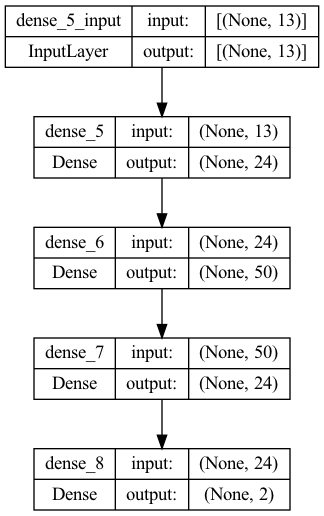

In [8]:
# Create the model
model = Sequential()
model.add(Dense(24, input_dim = 13, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(2, activation='softmax'))
print(model.summary())
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(feats_train, Y_train, epochs=400, batch_size=40, verbose=1)

Epoch 1/400
1/6 [====>.........................] - ETA: 1s - loss: 0.6940 - accuracy: 0.4500

2022-11-19 15:02:11.375593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 22ms/step - loss: 0.6905 - accuracy: 0.5330
Epoch 2/400
6/6 [==============================] - 0s 11ms/step - loss: 0.6893 - accuracy: 0.5198
Epoch 3/400
6/6 [==============================] - 0s 11ms/step - loss: 0.6880 - accuracy: 0.5242
Epoch 4/400
6/6 [==============================] - 0s 11ms/step - loss: 0.6868 - accuracy: 0.5551
Epoch 5/400
6/6 [==============================] - 0s 11ms/step - loss: 0.6855 - accuracy: 0.5771
Epoch 6/400
6/6 [==============================] - 0s 11ms/step - loss: 0.6844 - accuracy: 0.6167
Epoch 7/400
6/6 [==============================] - 0s 11ms/step - loss: 0.6834 - accuracy: 0.6123
Epoch 8/400
6/6 [==============================] - 0s 11ms/step - loss: 0.6822 - accuracy: 0.5991
Epoch 9/400
6/6 [==============================] - 0s 11ms/step - loss: 0.6812 - accuracy: 0.6079
Epoch 10/400
6/6 [==============================] - 0s 11ms/step - loss: 0.6803 - accuracy: 0.6079
Epoch 11/400
6/6 [=============

In [10]:
test_results = model.evaluate(feats_val,Y_val, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

3/3 [==============================] - 0s 20ms/step - loss: 0.4794 - accuracy: 0.8421
Test results - Loss: 0.47936850786209106 - Accuracy: 0.8421052694320679%


2022-11-19 15:02:38.981997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
